# Neural Networks

In [1]:
import numpy as np

In [2]:
def softmax(a):
    e_a = np.exp(a)
    ans = e_a/np.sum(e_a,axis=1,keepdims=True)
    return ans

In [3]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
    
    def forward(self,X):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        Z1 = np.dot(X,W1) + b1
        a1 = np.tanh(Z1)
        
        Z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(Z2)
        
        Z3 = np.dot(a2,W3) + b3
        Y_ = softmax(Z3)
        self.acitvation_output = (a1,a2,Y_)
        return Y_
    
    def backward(self,X,Y,lr=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,Y_ = self.acitvation_output
        m = X.shape[0]
        
        delta3 = Y_ - Y
        
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        self.model['W1'] -= lr*dw1
        self.model['b1'] -= lr*db1
        
        self.model['W2'] -= lr*dw2
        self.model['b2'] -= lr*db2
        
        self.model['W3'] -= lr*dw3
        self.model['b3'] -= lr*db3
        
    def predict(self,X):
        Y_out = self.forward(X)
        return np.argmax(Y_,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,Y_ = self.acitvation_output
        
        print('W1 : ',W1.shape)
        print('A1 : ',a1.shape)
        
        print('W2 : ',W2.shape)
        print('A2 : ',a2.shape)
        
        print('W3 : ',W3.shape)
        print('YPred : ',Y_.shape)
        
        

In [4]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot_vector(v,depth):
    m = v.shape[0]
    oht = np.zeros((m,depth))
    oht[np.arange(m),v] = 1
    return oht
    

In [5]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [6]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

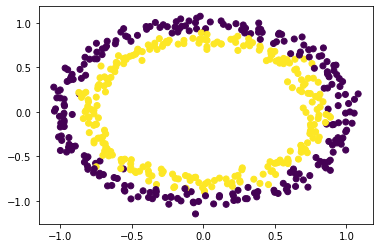

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [8]:
y_oht = one_hot_vector(Y,2)

In [9]:
print(y_oht)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

# Training the model

In [10]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [11]:
def train(X,Y,model,epochs,lr=0.0001,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot_vector(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,lr)
        if logs:
            print(f"Loss in epoch {ix} is : {l}")
        
    return training_loss

In [12]:
losses = train(X,Y,model,1000)

Loss in epoch 0 is : 0.3584061868870557
Loss in epoch 1 is : 0.3562190911925686
Loss in epoch 2 is : 0.35448940245559996
Loss in epoch 3 is : 0.3531285025111648
Loss in epoch 4 is : 0.35206131280511865
Loss in epoch 5 is : 0.35122589067512044
Loss in epoch 6 is : 0.3505721193909374
Loss in epoch 7 is : 0.3500600271978204
Loss in epoch 8 is : 0.34965806511891784
Loss in epoch 9 is : 0.34934151965429944
Loss in epoch 10 is : 0.34909113618130383
Loss in epoch 11 is : 0.3488919701397747
Loss in epoch 12 is : 0.34873245252332
Loss in epoch 13 is : 0.3486036428881766
Loss in epoch 14 is : 0.3484986394729531
Loss in epoch 15 is : 0.3484121173355307
Loss in epoch 16 is : 0.3483399688751474
Loss in epoch 17 is : 0.34827902520211007
Loss in epoch 18 is : 0.34822684078665883
Loss in epoch 19 is : 0.34818152733288454
Loss in epoch 20 is : 0.34814162578236574
Loss in epoch 21 is : 0.3481060077671765
Loss in epoch 22 is : 0.34807379976375247
Loss in epoch 23 is : 0.34804432472369196
Loss in epoch 24

Loss in epoch 271 is : 0.3466442816829933
Loss in epoch 272 is : 0.3466424134898549
Loss in epoch 273 is : 0.3466405496577297
Loss in epoch 274 is : 0.34663869014125986
Loss in epoch 275 is : 0.3466368348958793
Loss in epoch 276 is : 0.3466349838777985
Loss in epoch 277 is : 0.3466331370439878
Loss in epoch 278 is : 0.34663129435216283
Loss in epoch 279 is : 0.3466294557607686
Loss in epoch 280 is : 0.3466276212289649
Loss in epoch 281 is : 0.34662579071661215
Loss in epoch 282 is : 0.34662396418425667
Loss in epoch 283 is : 0.34662214159311727
Loss in epoch 284 is : 0.3466203229050711
Loss in epoch 285 is : 0.3466185080826413
Loss in epoch 286 is : 0.34661669708898274
Loss in epoch 287 is : 0.3466148898878704
Loss in epoch 288 is : 0.3466130864436865
Loss in epoch 289 is : 0.3466112867214079
Loss in epoch 290 is : 0.3466094906865951
Loss in epoch 291 is : 0.34660769830537963
Loss in epoch 292 is : 0.3466059095444533
Loss in epoch 293 is : 0.34660412437105664
Loss in epoch 294 is : 0.3

Loss in epoch 468 is : 0.346329807085385
Loss in epoch 469 is : 0.34632839936654775
Loss in epoch 470 is : 0.34632699305830217
Loss in epoch 471 is : 0.346325588156119
Loss in epoch 472 is : 0.3463241846554979
Loss in epoch 473 is : 0.34632278255196763
Loss in epoch 474 is : 0.3463213818410855
Loss in epoch 475 is : 0.3463199825184371
Loss in epoch 476 is : 0.3463185845796358
Loss in epoch 477 is : 0.34631718802032263
Loss in epoch 478 is : 0.3463157928361659
Loss in epoch 479 is : 0.346314399022861
Loss in epoch 480 is : 0.34631300657612973
Loss in epoch 481 is : 0.34631161549172024
Loss in epoch 482 is : 0.34631022576540704
Loss in epoch 483 is : 0.34630883739299007
Loss in epoch 484 is : 0.3463074503702949
Loss in epoch 485 is : 0.34630606469317216
Loss in epoch 486 is : 0.3463046803574977
Loss in epoch 487 is : 0.3463032973591713
Loss in epoch 488 is : 0.34630191569411795
Loss in epoch 489 is : 0.34630053535828614
Loss in epoch 490 is : 0.34629915634764835
Loss in epoch 491 is : 0.

Loss in epoch 761 is : 0.3459642874315621
Loss in epoch 762 is : 0.34596316678798594
Loss in epoch 763 is : 0.3459620468257042
Loss in epoch 764 is : 0.3459609275432495
Loss in epoch 765 is : 0.34595980893915823
Loss in epoch 766 is : 0.3459586910119703
Loss in epoch 767 is : 0.34595757376022934
Loss in epoch 768 is : 0.34595645718248247
Loss in epoch 769 is : 0.34595534127728056
Loss in epoch 770 is : 0.34595422604317805
Loss in epoch 771 is : 0.3459531114787328
Loss in epoch 772 is : 0.34595199758250633
Loss in epoch 773 is : 0.3459508843530638
Loss in epoch 774 is : 0.3459497717889736
Loss in epoch 775 is : 0.345948659888808
Loss in epoch 776 is : 0.3459475486511426
Loss in epoch 777 is : 0.3459464380745562
Loss in epoch 778 is : 0.34594532815763157
Loss in epoch 779 is : 0.34594421889895466
Loss in epoch 780 is : 0.34594311029711466
Loss in epoch 781 is : 0.34594200235070466
Loss in epoch 782 is : 0.3459408950583208
Loss in epoch 783 is : 0.34593978841856265
Loss in epoch 784 is : 

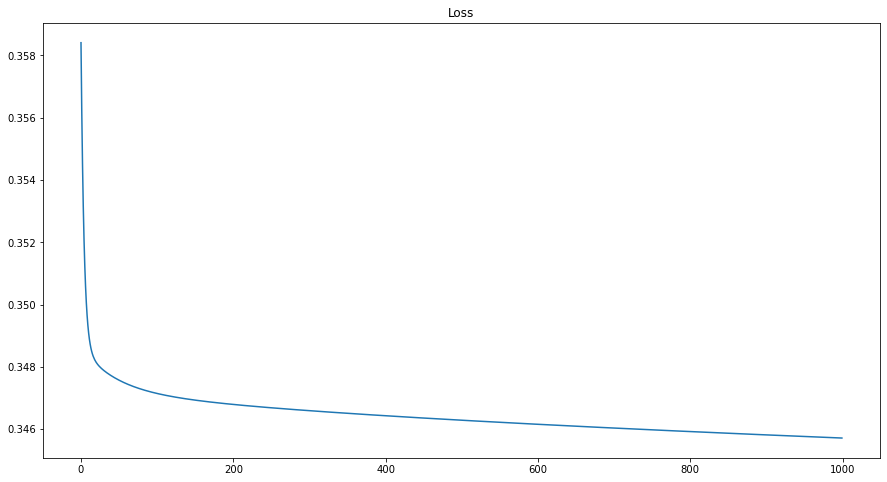

In [16]:
plt.figure(figsize=(15,8))
plt.title("Loss")
plt.plot(losses)
plt.show()